# 機械学習体験

## 機械学習とは

+ 機械学習とは
  + データをアルゴリズムに基づいて学習し、モデル（パターン・数式）を作成すること
+ 機械学習の種類
  + 教師あり学習
    + データと答え（教師データ）を用意して学習する方法
    + 分類問題、回帰問題に分かれる
  + 教師なし学習
    + データのみ用意（教師データなし）して学習する方法
    + クラスタリング、次元削減など
  > 教師あり学習、教師なし学習以外にも強化学習といった分野もあります。
+ 訓練データとテストデータ
  + 学習に使うデータは訓練データとテストデータに分割する
    + 訓練データ：モデルの学習に利用する
    + テストデータ：学習済みモデルの評価に利用する

+ scikit-learn
  + Pythonの機械学習ライブラリ
    + https://scikit-learn.org/stable/
    > Classification（分類）、Regression（回帰）、Clustering（クラスタリング）、Dimensionality reduction（次元削減）, Model selection（モデルの選択）, Preprocessing（前処理）
  + 参考：機械学習アルゴリズムの選び方
    + https://scikit-learn.org/stable/tutorial/machine_learning_map/
  + トイ・データセット
    + https://scikit-learn.org/stable/datasets/toy_dataset.html

# 機械学習体験 - 教師あり学習 - 回帰問題



## 例題1 - LinearRegression


`y = 5 * x + 10` という数式について考えてみましょう。

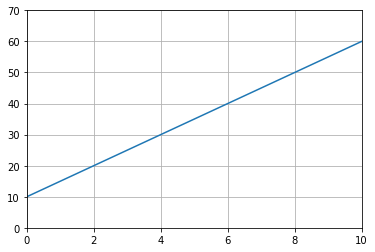

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 11)
y = 5 * x + 10

plt.grid()
plt.xlim(0, 10)
plt.ylim(0, 70)
plt.plot(x, y)
plt.show()

以下のデータ `x` と `y` から 線形回帰によって数式（ `y = 5 * x + 10` ）を算出してみましょう。

|x|y|
|:--|:--|
|0|10|
|1|15|
|2|20|
|3|25|
|4|30|
|5|35|
|6|40|
|7|45|
|8|50|
|9|55|
|10|60|

In [2]:
from sklearn.linear_model import LinearRegression

x = np.linspace(0, 10, 11).reshape(-1, 1)
y = np.linspace(10, 60, 11)

reg = LinearRegression()
reg.fit(x, y) # fit: 学習

sample_data = [[11], [100], [200]]
print(reg.predict(sample_data)) # predict: 推論

[  65.  510. 1010.]


+ `LinearRegression` は線形回帰クラス
+ `fit` メソッドで学習する
+ `predict` メソッドで推論する

学習によって算出した数式の 係数 と 切片を出力してみましょう。

In [3]:
print(reg.coef_) # coef_: 係数
print(reg.intercept_) # intercept_: 切片

[5.]
9.999999999999986


+ 学習済みモデル（変数reg）はcoef_（係数）を持つ
+ 学習済みモデル（変数reg）はintercept_（切片）を持つ

> scikit-learnにおいて、学習によって算出される内部パラメータは名前に `_` がつきます。

学習によって求めた数式でグラフを作成してみましょう。

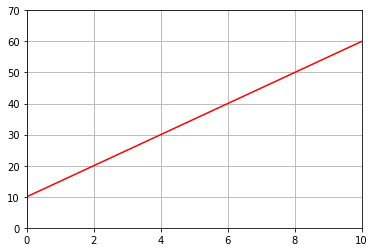

In [4]:
y2 = reg.predict(x)
plt.grid()
plt.xlim(0, 10)
plt.ylim(0, 70)
plt.plot(x, y2, color="red")
plt.show()

+ y = a * x + b
  + y : 目的変数
  + x : 説明変数
  + a : 係数（傾き）
  + b : 切片

> a, bは機械学習によって求めるパラメータです。機械学習の文脈では重みと呼ぶこともあります。

## 例題2 - ばらつきのあるデータ

次のデータを線形回帰モデルで表現してみましょう。

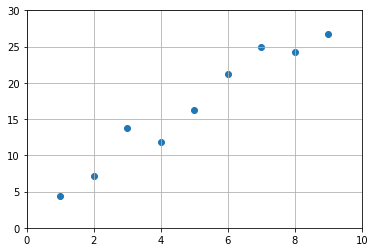

In [5]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([4.4, 7.2, 13.8, 11.9, 16.2, 21.2, 25.0, 24.2, 26.8])
plt.grid()
plt.xlim(0, 10)
plt.ylim(0, 30)
plt.scatter(x, y)
plt.show()

学習によって算出した数式の 係数 と 切片を出力してみましょう。

In [6]:
reg = LinearRegression()
reg.fit(x.reshape(-1, 1), y)

print("係数", reg.coef_)
print("切片", reg.intercept_)

係数 [2.87166667]
切片 2.3861111111111146


学習によって求めた数式でグラフを作成してみましょう。

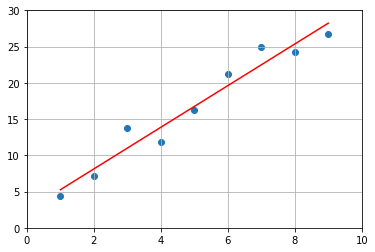

In [7]:
plt.grid()
plt.xlim(0, 10)
plt.ylim(0, 30)
plt.scatter(x, y)
plt.plot(x, reg.predict(x.reshape(-1, 1)), color="red")
plt.show()

### 参考：pandasによるデータ分析

In [8]:
import pandas as pd

df = pd.DataFrame({
    "x": x,
    "y": y
})
df

,x,y
0,1,4.4
1,2,7.2
2,3,13.8
3,4,11.9
4,5,16.2
5,6,21.2
6,7,25.0
7,8,24.2
8,9,26.8


データの概要を確認します。

In [9]:
df.describe()

,x,y
count,9.000000,9.000000
mean,5.000000,16.744444
std,2.738613,8.067080
min,1.000000,4.400000
25%,3.000000,11.900000
50%,5.000000,16.200000
75%,7.000000,24.200000
max,9.000000,26.800000


2変数の相関係数を出力します。

In [10]:
df.corr() # corr: 相関係数

,x,y
x,1.000000,0.974874
y,0.974874,1.000000


+ 相関係数とは２つの変数の関係性を表す指標
+ 正の相関の場合、1に近くなり、負の相関がある場合、-1に近くなる（相関がない場合は0に近づく）

> 正の相関：xが増えるとyも増える。負の相関：：xが増えるとyは減る。

In [11]:
# 参考： NumPyで相関係数を求める場合
z = np.array([x.reshape(-1), y])
np.corrcoef(z)

array([[1.        , 0.97487358],
       [0.97487358, 1.        ]])

散布図を出力してみましょう。

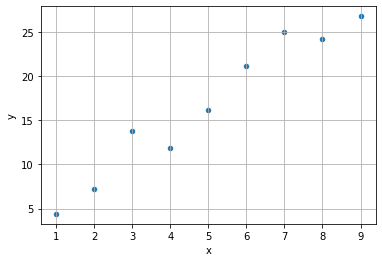

In [12]:
df.plot.scatter("x", "y", grid=True)

> 散布図からも正の相関を読み取れます。

線形回帰によって学習し、学習によって算出した数式の 係数 と 切片を出力してみましょう。

In [13]:
reg = LinearRegression()
reg.fit(df[["x"]], df["y"])

print("係数", reg.coef_)
print("切片", reg.intercept_)

係数 [2.87166667]
切片 2.3861111111111146


学習済みモデルによって推論した結果をDataFrameに追加してみましょう。



In [14]:
df["y2"] = reg.predict(df[["x"]])
df

,x,y,y2
0,1,4.4,5.257778
1,2,7.2,8.129444
2,3,13.8,11.001111
3,4,11.9,13.872778
4,5,16.2,16.744444
5,6,21.2,19.616111
6,7,25.0,22.487778
7,8,24.2,25.359444
8,9,26.8,28.231111


散布図と回帰式を出力してみましょう。

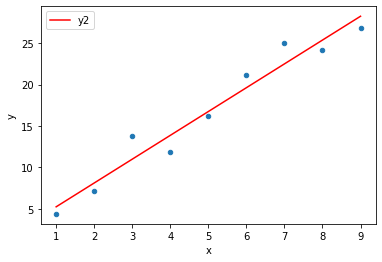

In [15]:
ax = df.plot.scatter("x", "y", grid=True)
df.plot("x", "y2", color="red", ax=ax)

## 例題3 - 学習済みモデルの評価

ml_score.csv ファイルをダウンロードします。

In [16]:
!wget https://gist.githubusercontent.com/murayama333/31d8861cb6308d7a9419b69c391314fd/raw/b96e29f5b46933e53baba326360a4ba949453857/ml_score.csv

--2021-02-15 02:18:43--  https://gist.githubusercontent.com/murayama333/31d8861cb6308d7a9419b69c391314fd/raw/b96e29f5b46933e53baba326360a4ba949453857/ml_score.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 613 [text/plain]
Saving to: ‘ml_score.csv.2’

ml_score.csv.2      100%[===================>]     613  --.-KB/s    in 0s      

2021-02-15 02:18:44 (7.04 MB/s) - ‘ml_score.csv.2’ saved [613/613]



ml_score.csvをDataFrameで出力してみましょう。

In [17]:
score_df = pd.read_csv("ml_score.csv")
score_df.head(10)

,math,science
0,56,30
1,49,47
2,49,37
3,55,40
4,66,45
5,58,43
6,68,54
7,58,64
8,59,45
9,69,65


> ここでは `math` から `science` を推論することとします。 この場合、`math` は説明変数であり、 `science` は目的変数です。

それぞれの変数の概要を確認します。

In [18]:
score_df.describe()

,math,science
count,100.000000,100.000000
mean,71.290000,63.890000
std,8.716981,11.591441
min,49.000000,30.000000
25%,66.000000,57.000000
50%,71.000000,64.000000
75%,76.250000,70.250000
max,93.000000,94.000000


個別の変数をヒストグラムにしてみましょう。

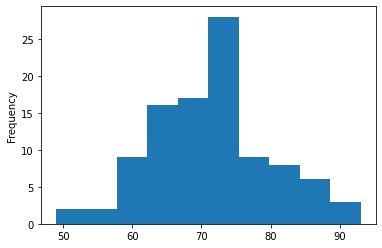

In [19]:
score_df["math"].plot.hist()

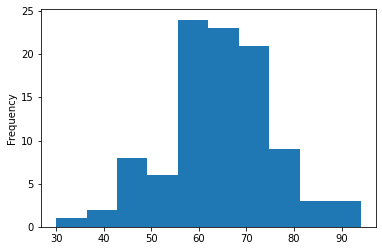

In [20]:
score_df["science"].plot.hist()

`math` と `science` の散布図を出力してみましょう。

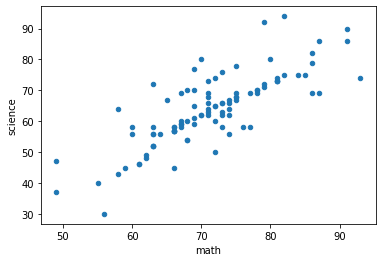

In [21]:
score_df.plot.scatter("math", "science")

相関係数を出力してみましょう。

In [22]:
score_df.corr()

,math,science
math,1.000000,0.795165
science,0.795165,1.000000


訓練データ（70件）とテストデータ（30件）に分割します。

In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(score_df[["math"]].values, score_df[["science"]].values, train_size=0.7, random_state=11)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(70, 1)
(30, 1)
(70, 1)
(30, 1)


訓練データで学習します。
それから学習済みモデルからスコア（決定係数）を出力します。

In [24]:
reg = LinearRegression()
reg.fit(x_train, y_train)

print("R^2 - train:", reg.score(x_train, y_train))
print("R^2 - test:", reg.score(x_test, y_test))

R^2 - train: 0.6345410276600879
R^2 - test: 0.6214551938423682


> 決定係数は1に近づくほど実測値と推論値のずれが少ないことを意味します。

学習済みモデルによって推論した結果をDataFrameに追加してみましょう。


In [25]:
score_df["pred_science"] = reg.predict(score_df[["math"]].values)
score_df

,math,science,pred_science
0,56,30,48.426735
1,49,47,41.406420
2,49,37,41.406420
3,55,40,47.423833
4,66,45,58.455757
...,...,...,...
95,86,82,78.513800
96,80,80,72.496387
97,87,86,79.516702
98,91,86,83.528311


散布図と回帰式を出力してみましょう。

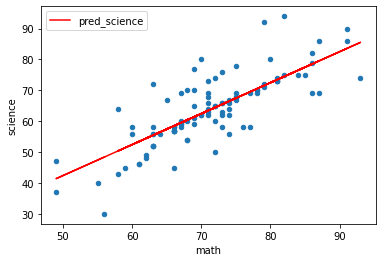

In [26]:
ax = score_df.plot.scatter("math", "science", grid=True)
score_df.plot("math", "pred_science", color="red", ax=ax)

## 参考：トイデータセット

scikit-learnには機械学習の勉強に利用できるシンプルなデータセットが用意されています。

+ https://scikit-learn.org/stable/datasets/toy_dataset.html

ボストン住宅データを例に見てみましょう。

In [27]:
from sklearn.datasets import load_boston

boston = load_boston()

print("DESCR:", boston.DESCR)
print("feature_names:", boston.feature_names)
print("target-shape:", boston.target.shape)
print("target:", boston.target[:3])
print("data-shape:", boston.data.shape)
print("data:", boston.data[:3])

DESCR: .. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRA

+ DESCR: データの説明
+ feature_names: 特徴量の名前
+ target: 期待値データ（目的変数）
+ data: 特徴量データ（説明変数）

> その他のトイ・データセットも同じようなフォーマットで定義されています。

DataFrameで表示してみましょう。

In [28]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


target を DataFrameに追加してみましょう。

In [29]:
boston_df["MEDV"] = boston.target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
